In [2]:
import tensorflow as tf

Getting Train, test, Validation Directories

In [3]:
train_dir = '/Users/uvaishnav/osteoscarcoma_evaluation_project/artifacts/train'
validation_dir = '/Users/uvaishnav/osteoscarcoma_evaluation_project/artifacts/Validation'
test_dir = '/Users/uvaishnav/osteoscarcoma_evaluation_project/artifacts/Test'

In [4]:
import os

Determinig Train Dataset

In [5]:
classes = os.listdir(train_dir)

for clas in classes:
    print("Class {} has {} images".format(clas,len(os.listdir(os.path.join(train_dir,clas)))))

Class Viable has 206 images
Class Non-Tumor has 373 images
Class Non-Viable-Tumor has 221 images


We can observe that the dataset is imbalenced and there are very few images which may not be sufficent for training

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
import matplotlib.pyplot as plt

Augmentation

In [8]:
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values to [0, 1]
    rotation_range=20,  # Random rotation
    width_shift_range=0.2,  # Random horizontal shift
    height_shift_range=0.2,  # Random vertical shift
    shear_range=0.2,  # Shear transformation
    zoom_range=0.2,  # Random zoom
    horizontal_flip=True,  # Random horizontal flip
    fill_mode = 'nearest'
)

In [9]:
test_val_datagen = ImageDataGenerator(
    rescale = 1.255
)

In [10]:
img_height = 224
img_width = 224
batch_size = 32

In [11]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle = True
)

Found 800 images belonging to 3 classes.


In [12]:
validation_generator = test_val_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 170 images belonging to 3 classes.


In [13]:
test_generator = test_val_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 174 images belonging to 3 classes.


In [14]:
type(train_generator)

keras.src.preprocessing.image.DirectoryIterator

Visualize some augmeted images

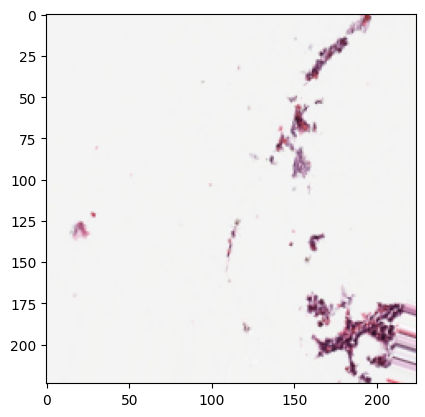

In [15]:
image = train_generator[0][0][2]
plt.imshow(image)
plt.show()

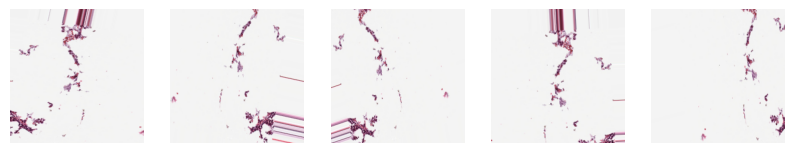

In [16]:
augmented_images = [train_generator[0][0][2] for i in range(5)]
plt.figure(figsize=(10, 10))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(augmented_images[i])
    plt.axis('off')
plt.show()